In [5]:
import os
import gzip

from matplotlib import pyplot as plt

# Download human genome from ensembl

From [Ensembl](https://www.ensembl.org/info/data/ftp/index.html), we can download each chromosome:

In [10]:
url = 'ftp://ftp.ensembl.org/pub/release-96/fasta/homo_sapiens/dna/Homo_sapiens.GRCh38.dna.chromosome.{0}.fa.gz'

In [3]:
chromosome_list = list(range(1, 23)) + ['X', 'Y', 'MT']

In [8]:
for chrom in chromosome_list:
    print('downloading chromsome {}'.format(chrom))
    os.system(('wget -O /scratch/chrom{0}.fa.gz ' + url).format(chrom))

downloading chromsome 1
downloading chromsome 2
downloading chromsome 3
downloading chromsome 4
downloading chromsome 5
downloading chromsome 6
downloading chromsome 7
downloading chromsome 8
downloading chromsome 9
downloading chromsome 10
downloading chromsome 11
downloading chromsome 12
downloading chromsome 13
downloading chromsome 14
downloading chromsome 15
downloading chromsome 16
downloading chromsome 17
downloading chromsome 18
downloading chromsome 19
downloading chromsome 20
downloading chromsome 21
downloading chromsome 22
downloading chromsome X
downloading chromsome Y
downloading chromsome MT


We have a look at on FASTA:

In [21]:
fh = gzip.open('data/chromMT.fa.gz'.format(chrom))
for _ in range(10):
    print(bytes.decode(next(fh).strip()))  # skip the header

>MT dna:chromosome chromosome:GRCh38:MT:1:16569:1 REF
GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCCATGCATTTGGTATTTT
CGTCTGGGGGGTATGCACGCGATAGCATTGCGAGACGCTGGAGCCGGAGCACCCTATGTC
GCAGTATCTGTCTTTGATTCCTGCCTCATCCTATTATTTATCGCACCTACGTTCAATATT
ACAGGCGAACATACTTACTAAAGTGTGTTAATTAATTAATGCTTGTAGGACATAATAATA
ACAATTGAATGTCTGCACAGCCACTTTCCACACAGACATCATAACAAAAAATTTCCACCA
AACCCCCCCTCCCCCGCTTCTGGCCACAGCACTTAAACACATCTCTGCCAAACCCCAAAA
ACAAAGAACCCTAACACCAGCCTAACCAGATTTCAAATTTTATCTTTTGGCGGTATGCAC
TTTTAACAGTCACCCCCCAACTAACACATTATTTTCCCCTCCCACTCCCATACTACTAAT
CTCATCAATACAACCCCCGCCCATCCTACCCAGCACACACACACCGCTGCTAACCCCATA


Load some chromosomes into a python dictionary

In [14]:
chromosome_list = ['1', '7', '22', 'MT']

In [15]:
genome = {}
for chrom in chromosome_list:
    genome[chrom] = ''
    fh = gzip.open('data/chrom{0}.fa.gz'.format(chrom))
    _ = next(fh)  # skip the header
    genome[chrom] = ''.join(bytes.decode(line.strip()) for line in fh)

Check chromosome sizes

In [16]:
for chrom in chromosome_list:
    print('{:3} {}'.format(chrom, len(genome[chrom])))

1   248956422
7   159345973
22  50818468
MT  16569


## plot chromosome length

In [17]:
from matplotlib import pyplot as plt
import matplotlib as mpl

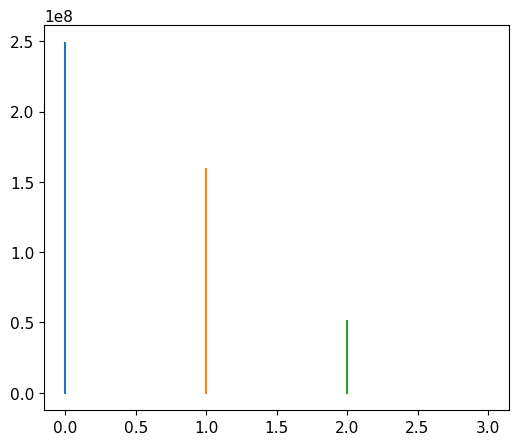

In [18]:
for n, chrom in enumerate(chromosome_list):
    plt.plot([n, n], [0, len(genome[chrom])])

Longest chromosome is 250 Mb

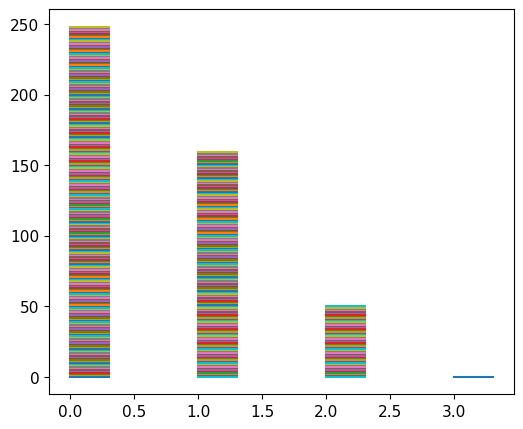

In [22]:
reso = 1000000

for n, chrom in enumerate(chromosome_list):
    for y in range(int(len(genome[chrom]) / reso) + 1):
        plt.plot([n, n + 0.3], [y, y])

Each colored line, represents 1 milion nucleotides... just like A game of thrones first book.

## GC content

Distribution of sizes

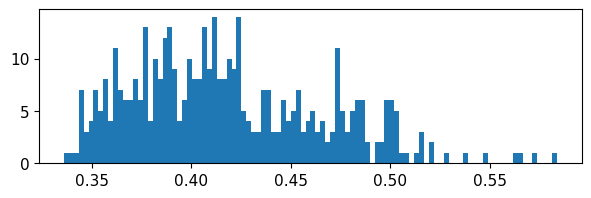

In [23]:
plt.figure(figsize=(7, 2))

gcs = []
for n, chrom in enumerate(chromosome_list):
    for y in range(int(len(genome[chrom]) / reso)):
        sub_seq = genome[chrom][y * reso:(y + 1) * reso]
        gc = sub_seq.count('C') + sub_seq.count('G')
        ns = sub_seq.count('N')
        try:
            gcs.append(gc / (reso - ns))
        except ZeroDivisionError:
            continue

_ = plt.hist(gcs, bins=100)

In [24]:
max_gc, min_gc = max(gcs), min(gcs)
diff_gc = max_gc - min_gc
print(min_gc, max_gc, diff_gc)

0.335929 0.5837117129173197 0.24778271291731974


Plot different GC contents

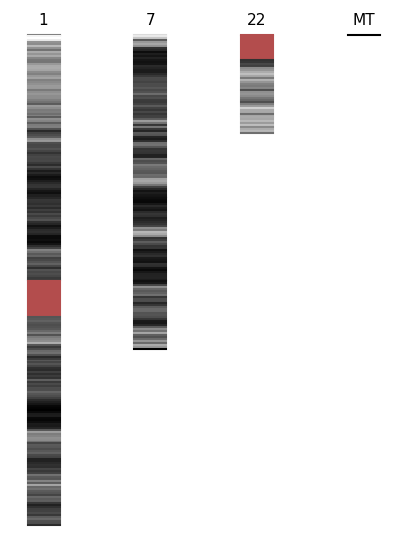

In [29]:
plt.figure(figsize=(5, 7))

# maximum percentage of Ns allowed
max_ns = reso * 0.3

for n, chrom in enumerate(chromosome_list):
    for y in range(int(len(genome[chrom]) / reso) + 1):
        sub_seq = genome[chrom][y * reso:(y + 1) * reso]
        gc = sub_seq.count('C') + sub_seq.count('G')
        ns = sub_seq.count('N')
        if ns > max_ns:
            cs = (0.7, 0.3, 0.3)
        else:
            c = gc / (reso - ns)
            # rescale GC
            c -= min_gc
            c /= diff_gc
            c = max(0, c)
            cs = (c, c, c)        
        plt.plot([n, n + 0.3], [-y, -y], color=cs)
    plt.text(n + 0.15, 5, chrom, ha='center')

_ = plt.axis('off')

Just like typical karyotype image:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/NHGRI_human_male_karyotype.png/765px-NHGRI_human_male_karyotype.png)

# The BRAF gene

The BRAF (BRAF1) genes is located in Chromosome 7: 140,719,327-140,924,928 reverse strand.

In [93]:
braf_beg = 140719327
braf_end = 140924928

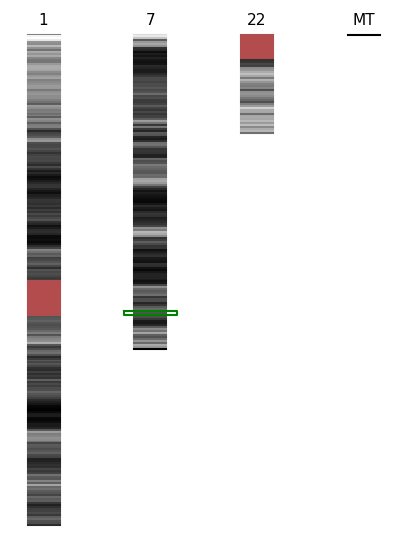

In [102]:
plt.figure(figsize=(5, 7))

# maximum percentage of Ns allowed
max_ns = reso * 0.3

for n, chrom in enumerate(chromosome_list):
    for y in range(int(len(genome[chrom]) / reso) + 1):
        sub_seq = genome[chrom][y * reso:(y + 1) * reso]
        gc = sub_seq.count('C') + sub_seq.count('G')
        ns = sub_seq.count('N')
        if ns > max_ns:
            cs = (0.7, 0.3, 0.3)
        else:
            c = gc / (reso - ns)
            # rescale GC
            c -= min_gc
            c /= diff_gc
            c = max(0, c)
            cs = (c, c, c)        
        plt.plot([n, n + 0.3], [-y, -y], color=cs)
    plt.text(n + 0.15, 5, chrom, ha='center')

plt.plot([0.9, 1.4, 1.4, 0.9, 0.9], [-braf_beg / reso + 1, -braf_beg / reso + 1, 
                                     -braf_end / reso - 1, -braf_end / reso - 1, -braf_beg / reso + 1], 
         ls='-', color='green')
_ = plt.axis('off')

### The full gene

In [147]:
genome['7'][braf_beg:braf_end]

'GAAGACTTCTCCATGCAGTCAATCTTTATTATAGCAGTATTCGCATATTCACATCAAGTACATAGAACTTTTTTTGCCTTTTATATAATACAGTTTTTAAATAACTTTACACAGAAATAAATTTCTTCAATCTGAATTTCAGCTATCTTTTTTTATTCTCCATGCTTTCTATCCAAACTGAACAATATTTTCTGTTATACAAATTTACATGAGAAAAACTCCAAAGTACAAATGAAGGGACCTGAGCAGGAAAGAGAACCAAAGTATCAGGAAGTGGGTATGGGGGAGAATTAAAAAAAATAATAAAAGATTCAAGCAAACATTGAGAATAGGGGAAAAGAGGGAGACATCATCCATTTGACTGAAAATAAATGTCTTTTTTATGAATTGAAAAATAAGCTTTAAAAATAGTTACTCCATTGTAATTTTTGCAAAGCAGGTATAGAGAGGTCTGTGGACAATTAAAAAGTCCCCATCTTTTCACTGGGCACGCCCCAGACTCCACGAGAACCTTTTCAATGCTTGAGTGGAACTGAAGTGTACTAAACCCGAACCTTTGGCAGTAACAGAAAAGAGGAATGTGTGTGTGAGTCGCCATAAGGTTTGGAGTGGTGAAACAGGAACCGTGAATTCACTGCAGTTCAAACAGGAAGCATCTCCCTTTCCTCTCCCTTACAGGAGTCATGTCCTCAAACCAAGGAATACATGAAAAGGGGGGATTTCCTTTTTCTTGGTCTAAACCAAAGAGCAATGACAACTACTGAATAAAATTCAGAGACACATGTTGATGAATGATCAAATTCAATCCCCTGATCAGTTGTATGATCCTATCTTAGGAAAGGCAGCAATTGCCATGTTGAGGAAAGGATCAGATGTACAACCAACAAATGAGATTACCACAAATACATATCACTGTGATACAGTCCTCAAAAATCAGGCGATATCATGAAGGCCAAACTGAGTCTATATATGTGGCATGGCCAAAGGAAACACGGAGGA

In [148]:
genome['7'][braf_beg:braf_end][::-1]

'AAGGGGGTTAGGGGAGTCCGAGCCGACGCGGGCCCCGGCGCCCGGCCATGGACTCCACCGGGTCCGCGGGAGGCGGGCGCCGCGGCGGGCCCGGCGAGGAGGGGCGCGGGGGGCGCGGGGGGCGAGGAGGCGGAGGCGGAGGCGGAGGCGGAGGGGGTCGAGAGGCGGAGGGAAGGGGGAGGGGCGGGCTGTCGCCGGCGAGCCCGGGGCCGAGAGCCAATATTCTACCGCCGCGACTCGCCACCGCCACCACCGCCGCGCCTCGGCCCGGTCCGAGACAAGTTGCCCCTGTACCTCGGGCTCCGGCCGCGGCCGCGGCCGCGGCGCCGGAGAAGCCGACGCCTGGGACGGTAAGGCCTCCTCCACTCACGACCGCGGTGGGACGGCGGGAGGGCTGAGGCCCGAGCCGCCGACCGACCACAAATAAAACCTTTCTCCGCCGCCACCCCCGAACTACGGGAGTCGGTGGAAGAGCCCGGTCGAGGCGCCCGACCCTCCACCCGTAGCGGGGGCACAGGGAGAGGCAGTACGTCGCGGAAGGATGCATTTGTGTGTGTTACCGGGCCCCCCAAAGGGACCGGGGGTGGGGTCTACACCCCTAACCCCGTCGCCACCAACTCGCCCTCCGATAGTTATCCCCCGCTTTGAGTCCCAACCAGGCTCTTCCAGTGCTAACCGACTTCATAGGTCGAGACGTAGAGACACCCCACCCCCGCCGCCGCCGGAGCTGCACCTCCTATATCCAATCAACGACCCCGACTCTGTTGTCGGGCTCAATGACAGCGCACATTAAGAATGTACCAGCACCCCTACTACCCCGAGTAGTAAAGGAGAGAGGAGAGGGCCTGACGGGGGGAAGAGTCAGGCGACGGGAAAAAGTGAAAAGATAAACCCCTAAAGAGAAGTGGACAAAATGGGTCGTTTAATAAAACTAAATCAGAAATGAAAAAGTTAGGATTTAGCGTCAAAGGCTACGGAAAAGACCAGAGACCAGGAGAC

A very long gene, most of it will not be used to form the protein:

![](http://static.ensembl.org/img-tmp/temporary/2019_10_01/LWJXKPMCNKJNIDIIWEAAAfAT.png)

We can focus on a specific "exon", the 15th

In [171]:
exon15_beg = 140753275
exon15_end = 140753390 # removed last 2 nucleotides to match codon

In [172]:
genome['7'][exon15_beg:exon15_end][::-1]

'ATAAAGAAGTACTTCTGGAGTGTCATTTTTATCCACTAAAACCAGATCGATGTCACTTTAGAGCTACCTCACCCAGGGTAGTCAAACTTGTCAACAGACCTAGGTAAAACACCTA'

In [173]:
exon15 = genome['7'][exon15_beg:exon15_end][::-1]

### From DNA to protein

In [174]:
complementary = {
    'A': 'T',
    'T': 'A',
    'C': 'G',
    'G': 'C'}

In [178]:
transcribe = {
    'A': 'U',
    'T': 'A',
    'C': 'G',
    'G': 'C'}

In [175]:
translate = {
    'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M', 'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
    'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K', 'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
    'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L', 'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
    'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q', 'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
    'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V', 'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
    'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E', 'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
    'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S', 'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
    'TAC':'Y', 'TAT':'Y', 'TAA':'.', 'TAG':'.', 'TGC':'C', 'TGT':'C', 'TGA':'.', 'TGG':'W'}

In [184]:
print ('{:<9}{:<9}{:<9}{:<9}'.format('Genomic', 'Genomic', 'mRNA', 'Amino-'))
print ('{:<9}{:<9}{:<9}{:<9}'.format('DNA (-)', 'DNA (+)', '', 'acid'))

for i in range(0, 3 * (len(exon15) // 3), 3):
    dna_codon = seq[i:i + 3]
    cmp_codon = ''.join(complementary[n] for n in dna_codon)
    rna_codon = ''.join(transcribe[n] for n in cmp_codon)
    aa = translate[cmp_codon]
    print('{:<9}{:<9}{:<9}{:<9}'.format(dna_codon, cmp_codon, rna_codon, aa))

Genomic  Genomic  mRNA     Amino-   
DNA (-)  DNA (+)           acid     
TAT      ATA      UAU      I        
AAA      TTT      AAA      F        
GAA      CTT      GAA      L        
GTA      CAT      GUA      H        
CTT      GAA      CUU      E        
CTG      GAC      CUG      D        
GAG      CTC      GAG      L        
TGT      ACA      UGU      T        
CAT      GTA      CAU      V        
TTT      AAA      UUU      K        
TAT      ATA      UAU      I        
CCA      GGT      CCA      G        
CTA      GAT      CUA      D        
AAA      TTT      AAA      F        
CCA      GGT      CCA      G        
GAT      CTA      GAU      L        
CGA      GCT      CGA      A        
TGT      ACA      UGU      T        
CAC      GTG      CAC      V        
TTT      AAA      UUU      K        
AGA      TCT      AGA      S        
GCT      CGA      GCU      R        
ACC      TGG      ACC      W        
TCA      AGT      UCA      S        
CCC      GGG      CCC      G        
A

... this is one genome, one **reference** genome, and we all have unique genomes.